KNN Regression
Read more at https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [17]:
#dfTrain = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTrainingData.csv')  

import requests
import io
url="https://manmohan291.s3.ap-south-1.amazonaws.com/LinearRegressionDS/LinearRegressionTrainingData.csv"
s=requests.get(url).content
dfTrain=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [18]:
dfTrain.head()

,X,Y
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965


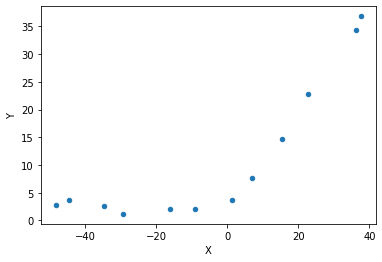

In [19]:
dfTrain.plot(x='X',y='Y',kind='scatter')
plt.show()

In [30]:
#import sklearn.linear_model  as LR
import sklearn.neighbors as KNN

df_Features=dfTrain.iloc[:,0:1]
df_Label=dfTrain.iloc[:,1:2]

X=np.array([[1],[2],[3]])
Y=np.array([[1],[2],[2]])
K=3
RegObj=KNN.KNeighborsRegressor(n_neighbors = K).fit(X,Y)

In [31]:
RegObj.predict([[5]])

array([[1.66666667]])

In [22]:
X.shape

(3, 1)

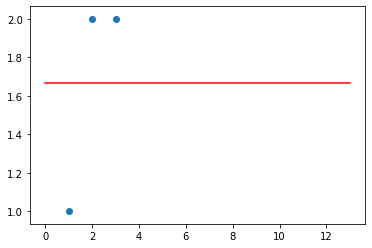

In [23]:
#plotting
plt.scatter(X,Y) 
x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+10 
u = np.linspace(x_min, x_max, 100)

u.shape=(len(u),1)

newx=u
newy=RegObj.predict(newx)

plt.plot(newx,newy,color='r') 
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
pY=RegObj.predict(X)
mse=mean_squared_error(Y, pY)
rmse=np.sqrt(mse)
print("RMSE={0:.2f}".format(rmse))

RMSE=0.47


# Implement KNN your own
KNN Regression Algorithm
Step1: Choose K neighbors using Distance function
Step2: Average K neighbours
Distance Functions (Continuous Data)
Ecludian Distance $=  \displaystyle \sqrt{\sum _{i=1}^n (X_i- Y_i)^2}$

Try out prediction for example X=[[0]]

In [25]:
def My_KNN_Predict(newX,X,Y,K):
    trainBatchSize=X.shape[0]
    predictBatchSize=newX.shape[0]
    pY=np.zeros((newX.shape[0],1))

    distanceList=np.zeros(Y.shape)

    for i in range(predictBatchSize): 

        #Step1:Calculate Distances
        distanceValues=np.linalg.norm(newX[i,:]-X,axis=1)
        distanceList=np.column_stack((distanceValues,Y))

        #Step2: Sort Distances
        sortedList=distanceList[distanceList[:,0].argsort()]


        #Step3: Pick top K
        topKList=sortedList[:K,:]



        #Step4: GetMost mean of Y among top K    
        predY=topKList[:,1].mean()

        pY[i]=predY
            
                    
    
    return pY

In [26]:
#Predict
My_KNN_Predict(np.array([[5]]),X,Y,K)

array([[1.66666667]])

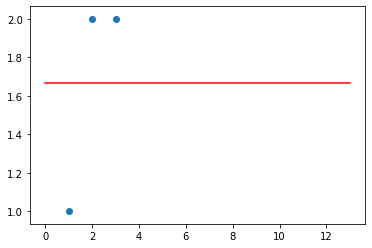

In [32]:
#plotting
plt.scatter(X,Y) 
x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+10 
u = np.linspace(x_min, x_max, 100)

u.shape=(len(u),1)
newx=u
newy=My_KNN_Predict(newx,X,Y,K)

plt.plot(newx,newy,color='r') 
plt.show()

In [33]:
def getRMSE(aY,pY):
    Error=aY- pY
    ErrorSqr=Error**2
    MSE=ErrorSqr.mean()
    RMSE=np.sqrt(MSE)
    return RMSE

In [34]:
#RMSE on training Data
pY=My_KNN_Predict(X,X,Y,K)
rmse=getRMSE(Y, pY)
print("RMSE={0:.2f}".format(rmse))

RMSE=0.47
